Submitted by :- 
Name - Omm Tripathi | 
Roll No - 23051606 | 
Section - CSE-35 | 
Lab - PoM-Lab2|
Assignment- 1

-------------------------------------------------------------------------------------

# A comparative study of various Classfication algorithms

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# SVM

Problem Statement:-  Support Vector Machine (SVM) algorithm for predicting user purchase classification. It utilizes the user-data.csv dataset, which contains information about users and their purchase behavior.

Dataset used :- https://github.com/kshitizrohilla/user-purchase-prediction-and-classification-using-support-vector-machine-algorithm/blob/main/data/user-data.csv

In [2]:
dfsvm = pd.read_csv('user-data.csv')
dfsvm.head()

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dfsvm.drop(columns=['user_id','gender'],inplace=True)

In [4]:
dfsvm.head()

,age,estimated_salary,purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [6]:
X = dfsvm.iloc[:,0:2]
y = dfsvm.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [8]:
scl = StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)

In [9]:
svc = SVC(kernel="linear", random_state=0)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)



In [10]:
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test, y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("confusion_matrix \n",confusion_matrix(y_test,y_pred))

accuracy_score 0.85
precision_score 0.967741935483871
recall_score 0.6382978723404256
confusion_matrix 
 [[72  1]
 [17 30]]


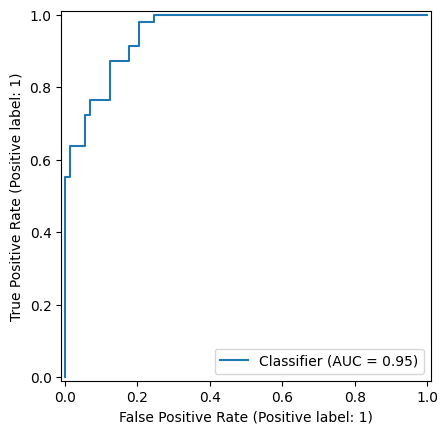

In [11]:
y_scores = svc.decision_function(X_test_scaled)
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_scores)

plt.show()

# Decision Tree

Problem Statement:- The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Dataset used :- https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [12]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X=df.iloc[:,0:8]
y = df.iloc[:,-1]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [15]:
scl2 =StandardScaler()
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=5)
dt.fit(X_train_scaled,y_train)
y_pred = dt.predict(X_test_scaled)


In [17]:
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score",precision_score(y_test, y_pred))
print("recall_score",recall_score(y_test,y_pred))
print("confusion_matrix \n",confusion_matrix(y_test,y_pred))

accuracy_score 0.7922077922077922
precision_score 0.7446808510638298
recall_score 0.6363636363636364
confusion_matrix 
 [[87 12]
 [20 35]]


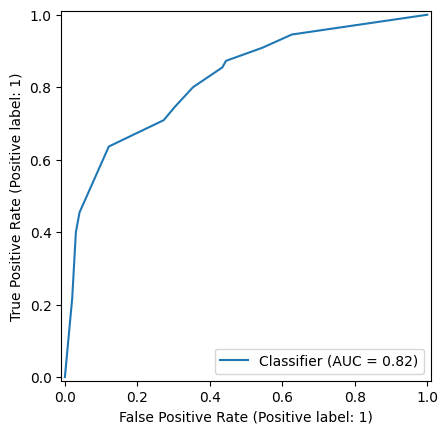

In [18]:
y_scores = dt.predict_proba(X_test_scaled)[:, 1]
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_scores)
plt.show()

# Logistic Regression

Problem Statement:- Classify iris plants into three species in this classic dataset

Dataset used :- https://www.kaggle.com/datasets/uciml/iris


In [19]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.drop(columns=['Id'],inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
ln  = LabelEncoder()
df['Species'] = ln.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,random_state=42,test_size=0.3)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [25]:
print("accuracy_score",accuracy_score(y_test,y_pred))
print("precision_score", precision_score(y_test, y_pred, average='macro'))
print("recall_score", recall_score(y_test, y_pred, average='macro'))
print("confusion_matrix \n",confusion_matrix(y_test,y_pred))

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
confusion_matrix 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
# y_scores = lr.predict_proba(X_test)[:, 1]
# from sklearn.metrics import RocCurveDisplay
# RocCurveDisplay.from_predictions(y_test, y_scores)
# plt.show()

# KNN

Problem Statement:- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.Predict whether the cancer is benign or malignant

Dataset used :- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [28]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [29]:
X = df.iloc[:, 0:30] 
y = df.iloc[:, 30]

X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
knn = KNeighborsClassifier(metric='euclidean',n_neighbors=9)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)


In [31]:
print("accuracy_score",accuracy_score(Y_test,y_pred))
print("precision_score",precision_score(Y_test, y_pred))
print("recall_score",recall_score(Y_test,y_pred))
print("confusion_matrix \n",confusion_matrix(Y_test,y_pred))

accuracy_score 0.9736842105263158
precision_score 0.9583333333333334
recall_score 1.0
confusion_matrix 
 [[42  3]
 [ 0 69]]


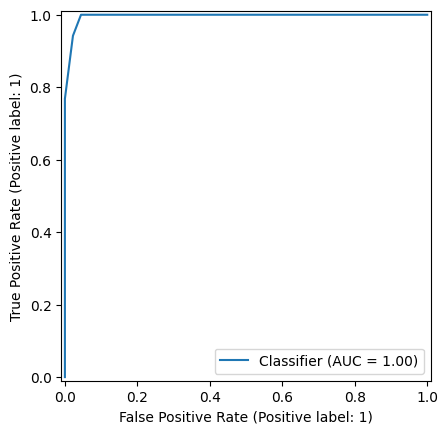

In [32]:
y_scores = knn.predict_proba(X_test)[:, 1]
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, y_scores)
plt.show()

# Comparison

Problem Statement:- Comparison of Various classification algorithms on Breast Cancer Dataset

Dataset used :- https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [33]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [35]:
dtfinal= DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=5)
knnfinal = KNeighborsClassifier(metric='euclidean',n_neighbors=5)
svmfinal = SVC(kernel="rbf", random_state=0)
lrfinal = LogisticRegression()

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train_scaled = scl.fit_transform(X_train)
X_test_scaled = scl.transform(X_test)

In [37]:
dtfinal.fit(X_train_scaled,y_train)
y_preddt = dtfinal.predict(X_test_scaled)

knnfinal.fit(X_train_scaled,y_train)
y_predknn = knnfinal.predict(X_test_scaled)

svmfinal.fit(X_train_scaled,y_train)
y_predsvm = svmfinal.predict(X_test_scaled)

lrfinal.fit(X_train_scaled,y_train)
y_predlr = lrfinal.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

models = {
    "Decision Tree": dtfinal,
    "KNN": knnfinal,
    "SVM": svmfinal,
    "Logistic Regression": lrfinal
}

for name, model in models.items():
    
    y_pred = model.predict(X_test_scaled)
    if name == "SVM":
        y_prob = model.decision_function(X_test_scaled)
    else:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append([name, accuracy, precision, recall, f1, auc])

results_df = pd.DataFrame(results, columns=[
    "Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"
])

print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        Decision Tree  0.798701   0.760870  0.636364  0.693069  0.829477
1                  KNN  0.694805   0.583333  0.509091  0.543689  0.764096
2                  SVM  0.733766   0.645833  0.563636  0.601942  0.804959
3  Logistic Regression  0.753247   0.649123  0.672727  0.660714  0.814692


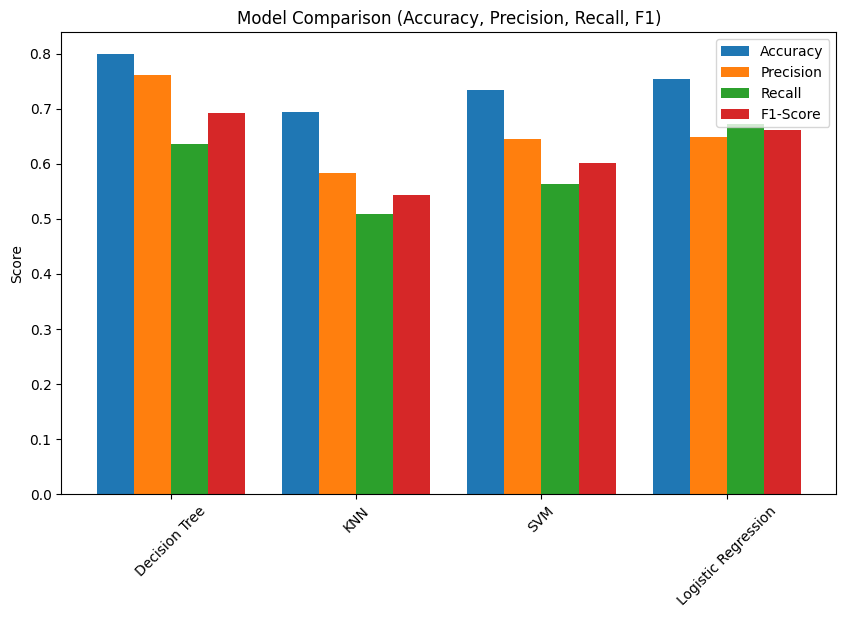

In [41]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

models = results_df["Model"]
x = np.arange(len(models)) 
width = 0.2                  

plt.figure(figsize=(10,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xticks(x + width*1.5, models, rotation=45)
plt.ylabel("Score")
plt.title("Model Comparison (Accuracy, Precision, Recall, F1)")
plt.legend()

plt.show()

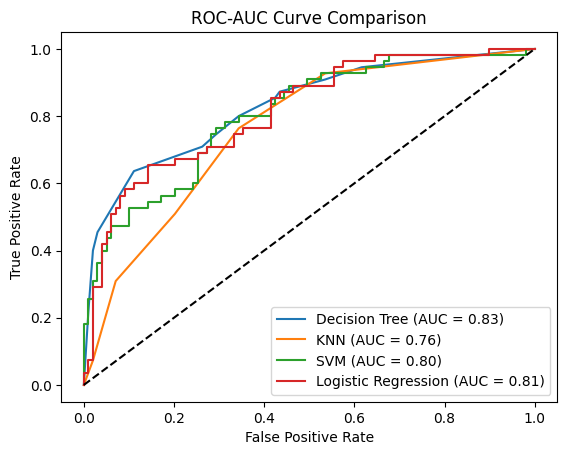

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = {
    "Decision Tree": dtfinal,
    "KNN": knnfinal,
    "SVM": svmfinal,
    "Logistic Regression": lrfinal
}

for name, model in models.items():
    if name == "SVM":
        y_scores = model.decision_function(X_test_scaled)
    else:
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend()
plt.show()